<a href="https://colab.research.google.com/github/hyunwjang/deep/blob/main/_3_1_%EC%BC%80%EB%9D%BC%EC%8A%A4_%EB%B3%B4%EC%8A%A4%ED%84%B4_%EC%A3%BC%ED%83%9D_%EA%B0%80%EA%B2%A9_%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 케라스 보스턴 주택 가격 모델

### modules import

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets.boston_housing import load_data
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.utils import plot_model

from sklearn.model_selection import train_test_split

import numpy as np

import matplotlib.pyplot as plt

### 데이터 로드
- 데이터의 수가 상당히 적기 때문에 테스트 데이터의 비율을 20%로 지정

- 13개의 특성을 가짐

- 각각의 특성이 모두 다른 스케일, 즉 단위가 모두 다름
  - 범죄율: 0~1 사이의 값
  - 방의 개수 3~9 사이의 값

- 정답 레이블은 주택 가격의 중간가격($1000 단위)

In [ ]:
tf.random.set_seed(111)

(x_train_full, y_train_full), (x_test, y_test) = load_data(path = 'bosthousing.npz', test_split = 0.2, seed = 111)

57026/57026 [==============================] - 0s 0us/step


### 데이터 확인

In [ ]:
print("학습 데이터 :{} \t 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("테스트 데이터 :{} \t 레이블: {}".format(x_test.shape, y_test.shape))


학습 데이터 :(404, 13) 	 레이블: (404,)
테스트 데이터 :(102, 13) 	 레이블: (102,)


In [ ]:
print(x_train_full[0])

[2.8750e-02 2.8000e+01 1.5040e+01 0.0000e+00 4.6400e-01 6.2110e+00
 2.8900e+01 3.6659e+00 4.0000e+00 2.7000e+02 1.8200e+01 3.9633e+02
 6.2100e+00]


In [ ]:
print(y_train_full[0])

25.0


### 데이터 전처리
- Standardization

- 특성의 단위가 모두 다르기 때문에 **동일한 범위로 조정**

In [ ]:
mean = np.mean(x_train_full, axis= 0)
std = np.std(x_train_full , axis = 0)

x_train_preprocessed = (x_train_full -mean) /std
x_test = (x_test - mean)/ std

x_train , x_val, y_train,y_val = train_test_split(x_train_preprocessed, y_train_full,
                                                    test_size = 0.3,
                                                    random_state = 111)


In [ ]:
print("학습 데이터 :{} \t 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터 :{} \t 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터 :{} \t 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터 :{} \t 레이블: {}".format(x_test.shape, y_test.shape))


학습 데이터 :(404, 13) 	 레이블: (404,)
학습 데이터 :(282, 13) 	 레이블: (282,)
검증 데이터 :(122, 13) 	 레이블: (122,)
테스트 데이터 :(102, 13) 	 레이블: (102,)


### 모델 구성
- 학습 데이터가 매우 적은 경우에 모델의 깊이를 깊게 할수록  
  과대적합(Overfitting)이 일어날 확률이 높음

In [ ]:
model = Sequential([Dense(100, activation = 'relu', input_shape = (13,), name = 'dense1'),
                    Dense(64, activation = 'relu',name = 'dense2'),
                    Dense(32, activation = 'relu', name = 'dense3'),
                    Dense(1, name = 'output')])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense1 (Dense)              (None, 100)               1400      
                                                                 
 dense2 (Dense)              (None, 64)                6464      
                                                                 
 dense3 (Dense)              (None, 32)                2080      
                                                                 
 output (Dense)              (None, 1)                 33        
                                                                 
Total params: 9,977
Trainable params: 9,977
Non-trainable params: 0
_________________________________________________________________


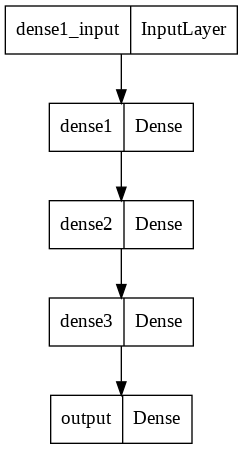

In [ ]:
plot_model(model)

### 모델 컴파일(compile)

- 회귀 문제에서는 주로 평균제곱오차(MSE, Mean Squared Error)를 손실함수로,  
  평균절대오차(MAE, Mean Absolute Error)를 평가지표로 많이 사용!

In [ ]:
model.compile(loss = 'mse',
              optimizer = Adam(learning_rate = 1e-2),
              metrics = ['mae'])

### 모델 학습

In [ ]:
history = model.fit(x_train,y_train, epochs = 300,
                    validation_data = (x_val, y_val))

Epoch 1/300
9/9 [==============================] - 0s 29ms/step - loss: 0.5954 - mae: 0.5657 - val_loss: 10.5115 - val_mae: 2.4649
Epoch 2/300
9/9 [==============================] - 0s 6ms/step - loss: 0.6279 - mae: 0.6098 - val_loss: 10.9091 - val_mae: 2.3572
Epoch 3/300
9/9 [==============================] - 0s 6ms/step - loss: 0.7280 - mae: 0.6302 - val_loss: 11.8063 - val_mae: 2.5198
Epoch 4/300
9/9 [==============================] - 0s 7ms/step - loss: 1.1118 - mae: 0.7688 - val_loss: 11.8004 - val_mae: 2.4703
Epoch 5/300
9/9 [==============================] - 0s 7ms/step - loss: 1.3739 - mae: 0.8889 - val_loss: 10.3230 - val_mae: 2.3844
Epoch 6/300
9/9 [==============================] - 0s 7ms/step - loss: 1.7939 - mae: 1.0335 - val_loss: 13.0948 - val_mae: 2.7055
Epoch 7/300
9/9 [==============================] - 0s 6ms/step - loss: 1.6104 - mae: 0.9368 - val_loss: 11.6943 - val_mae: 2.5529
Epoch 8/300
9/9 [==============================] - 0s 6ms/step - loss: 1.2462 - mae: 0.81

### 모델 평가 
- `evaluate()`

In [ ]:
model.evaluate(x_test,y_test)

4/4 [==============================] - 0s 5ms/step - loss: 14.6082 - mae: 2.6567


[14.60815715789795, 2.6567139625549316]

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


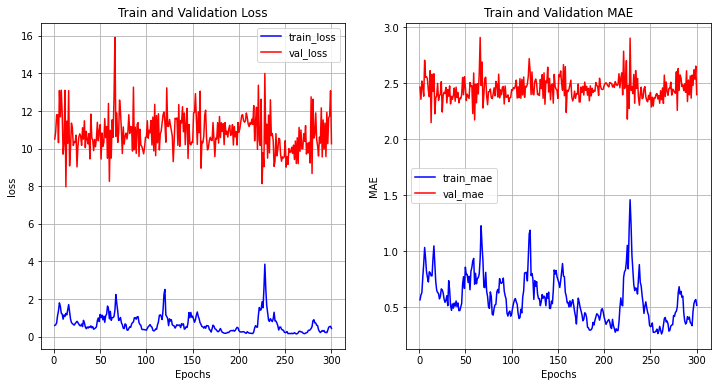

In [ ]:
history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']


epochs = range(1, len(loss) +1)
fig = plt.figure(figsize = (12,6))

ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'red', label = 'val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']


ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs, mae, color = 'blue', label = 'train_mae')
ax2.plot(epochs, val_mae, color = 'red', label = 'val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('MAE')
ax2.grid()
ax2.legend()

plt.show()

### K-Fold 교차 검증

- 데이터셋의 크기가 매우 작은 경우에  
  [훈련, 검증, 테스트] 데이터로 나누게 되면 과소적합이 일어날 확률이 높음

- 이를 해결하기 위해 K-Fold 교차 검증 실행
  <br>

  <img src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png" width="600">

  <sub>출처: https://scikit-learn.org/stable/modules/cross_validation.html</sub>

### 모델 재구성

In [ ]:
from sklearn.model_selection import KFold
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

In [ ]:
tf.random.set_seed(111)

(x_train_full, y_train_full), (x_test, y_test) = load_data(path = 'bosthousing.npz', test_split = 0.2, seed = 111)


mean = np.mean(x_train_full, axis= 0)
std = np.std(x_train_full , axis = 0)

x_train_preprocessed = (x_train_full -mean) /std
x_test = (x_test - mean)/ std


In [ ]:
k = 3

kfold = KFold(n_splits=k, random_state = 111,shuffle=True)

In [ ]:
def build_model():
  input = Input(shape=(13, ), name = 'input')
  hidden1 = Dense(100, activation = 'relu',name = 'dense1')(input)
  hidden2 = Dense(64, activation = 'relu',name = 'dense2')(hidden1)
  hidden3 = Dense(32, activation = 'relu', name = 'dense3')(hidden2)
  output = Dense(1, name = 'output')(hidden3)

  model = Model(inputs = [input], outputs = output)

  model.compile(loss = 'mse',
                optimizer = 'adam',
                metrics=['mae'])
  return model

In [ ]:
mae_list = []

In [ ]:
for train_idx, val_idx in kfold.split(x_train):
  x_train_fold, x_val_fold = x_train[train_idx], x_train[val_idx]
  y_train_fold, y_val_fold = y_train_full[train_idx],y_train_full[val_idx]

  model = build_model()

  model.fit(x_train_fold, y_train_fold, epochs = 300,
            validation_data = (x_val_fold, y_val_fold))
  
  _, test_mae =model.evaluate(x_test,y_test)

  mae_list.append(test_mae)


In [ ]:
print(mae_list)

[9.178657531738281, 8.82573413848877, 8.685356140136719]


In [ ]:
print(np.mean(mae_list))

8.89658260345459
